### Importación de datos



In [29]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda["tienda"] = "Tienda 1"
tienda2["tienda"] = "Tienda 2"
tienda3["tienda"] = "Tienda 3"
tienda4["tienda"] = "Tienda 4"

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [4]:
# Crear un diccionario con el nombre de la tienda y la cantidad de facturas (filas)
cantidades = {
    "Tienda 1": len(tienda),
    "Tienda 2": len(tienda2),
    "Tienda 3": len(tienda3),
    "Tienda 4": len(tienda4)
}



In [5]:
# Mostrar la cantidad de facturas por tienda
print("Cantidad de facturas por tienda:")
for tienda, cantidad in cantidades.items():
    print(f"{tienda}: {cantidad}")

# Encontrar la tienda con más facturas
tienda_mayor = max(cantidades, key=cantidades.get)
print(f"\nLa tienda con más facturas es: {tienda_mayor} con {cantidades[tienda_mayor]} facturas.")

Cantidad de facturas por tienda:
Tienda 1: 2359
Tienda 2: 2359
Tienda 3: 2359
Tienda 4: 2358

La tienda con más facturas es: Tienda 1 con 2359 facturas.


# 2. Ventas por categoría

In [32]:
# Unir todos los DataFrames en uno solo
todas_las_tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [33]:
print(todas_las_tiendas.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'tienda'],
      dtype='object')


In [34]:
# Crear una nueva columna con el total por venta (precio + costo de envío)
todas_las_tiendas['Total'] = todas_las_tiendas['Precio'] + todas_las_tiendas['Costo de envío']

# Agrupar por categoría del producto y sumar el total
ventas_por_categoria = todas_las_tiendas.groupby('Categoría del Producto')['Total'].sum().reset_index()

# Ordenar de mayor a menor venta
ventas_por_categoria = ventas_por_categoria.sort_values(by='Total', ascending=False)



In [35]:
ventas_por_categoria


,Categoría del Producto,Total
3,Electrónicos,1.749039e+09
2,Electrodomésticos,1.395147e+09
7,Muebles,7.981114e+08
4,Instrumentos musicales,3.672769e+08
1,Deportes y diversión,1.506693e+08
5,Juguetes,7.762570e+07
0,Artículos para el hogar,6.069090e+07
6,Libros,3.975600e+07


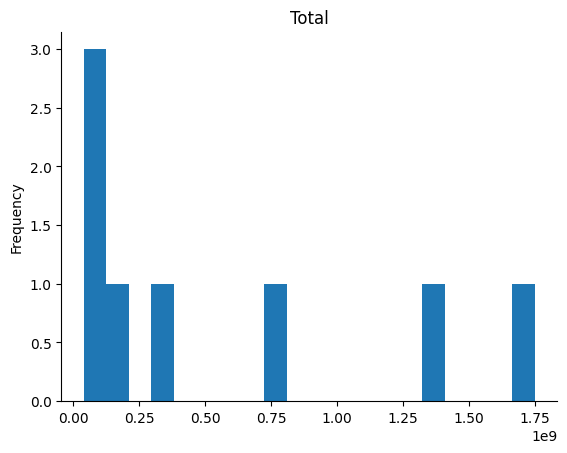

In [18]:
from matplotlib import pyplot as plt
ventas_por_categoria['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
ventas_por_categoria

,Categoría del Producto,Total
3,Electrónicos,1.749039e+09
2,Electrodomésticos,1.395147e+09
7,Muebles,7.981114e+08
4,Instrumentos musicales,3.672769e+08
1,Deportes y diversión,1.506693e+08
5,Juguetes,7.762570e+07
0,Artículos para el hogar,6.069090e+07
6,Libros,3.975600e+07


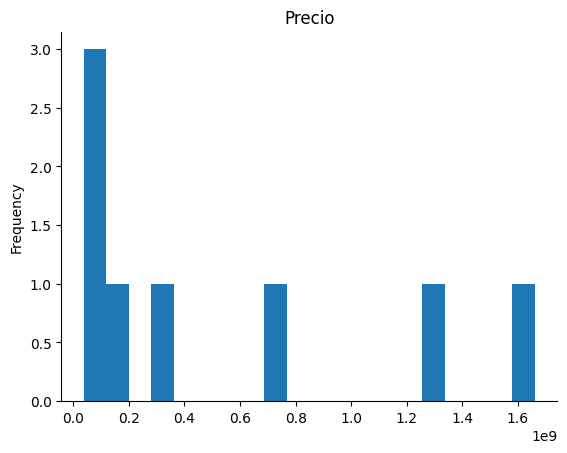

In [42]:
from matplotlib import pyplot as plt
_df_0['Precio'].plot(kind='hist', bins=20, title='Precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

# 3. Calificación promedio de la tienda


In [36]:
promedio_por_tienda = todas_las_tiendas.groupby('tienda')['Calificación'].mean().reset_index()

# Mostrar con dos decimales
promedio_por_tienda['Calificación'] = promedio_por_tienda['Calificación'].round(2)

print(promedio_por_tienda)

     tienda  Calificación
0  Tienda 1          3.98
1  Tienda 2          4.04
2  Tienda 3          4.05
3  Tienda 4          4.00


# 4. Productos más y menos vendidos

In [37]:
# Contar cuántas veces aparece cada producto
productos_mas_vendidos = todas_las_tiendas['Producto'].value_counts().reset_index()

# Renombrar las columnas para que se vean bien
productos_mas_vendidos.columns = ['Producto', 'Cantidad Vendida']

# Mostrar el producto más vendido
producto_top = productos_mas_vendidos.iloc[0]

print(f"El producto más vendido es: {producto_top['Producto']} con {producto_top['Cantidad Vendida']} ventas.")

El producto más vendido es: Mesa de noche con 210 ventas.


In [38]:
# Mostrar el producto menos vendido
producto_menos_vendido = productos_mas_vendidos.iloc[-1]

print(f"El producto menos vendido es: {producto_menos_vendido['Producto']} con {producto_menos_vendido['Cantidad Vendida']} venta(s).")

El producto menos vendido es: Celular ABXY con 157 venta(s).


# 5. Envío promedio por tienda

In [39]:
todas_las_tiendas


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda,Total
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1,171200.0
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1,200700.0
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1,225500.0
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1,798500.0
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1,355400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4,240300.0
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4,360600.0
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4,39100.0
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4,160100.0


In [44]:
promedio_por_tienda_envio = todas_las_tiendas.groupby('tienda')['Costo de envío'].mean().reset_index()

# Mostrar con dos decimales
promedio_por_tienda_envio['Costo de envío'] = promedio_por_tienda_envio['Costo de envío'].round(2)

print(promedio_por_tienda_envio)

     tienda  Costo de envío
0  Tienda 1        26018.61
1  Tienda 2        25216.24
2  Tienda 3        24805.68
3  Tienda 4        23459.46



# **Ventas por tienda, para ver cual es la tienda q mas vende**

In [47]:
# Agregar por tienda
ventasportiendas = todas_las_tiendas.groupby('tienda')['Total'].sum().reset_index()



print(ventasportiendas)

     tienda         Total
0  Tienda 1  1.212258e+09
1  Tienda 2  1.175829e+09
2  Tienda 3  1.156536e+09
3  Tienda 4  1.093693e+09


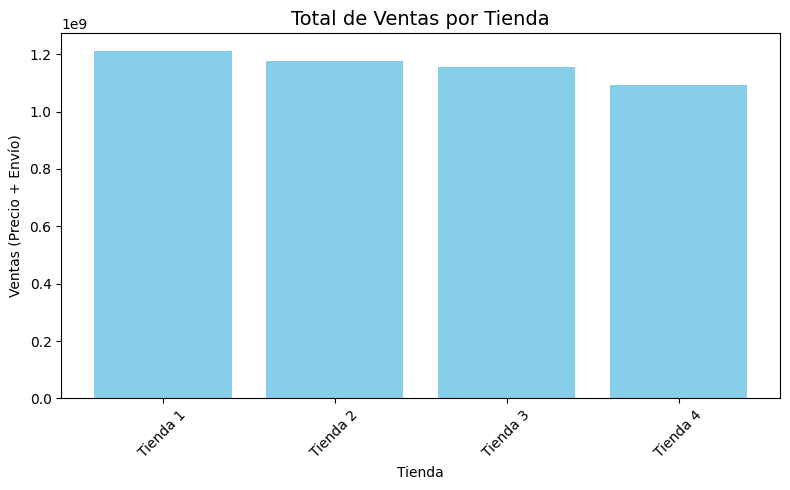

In [48]:
plt.figure(figsize=(8,5))
plt.bar(ventasportiendas["tienda"], ventasportiendas["Total"], color='skyblue')

# Títulos y etiquetas
plt.title("Total de Ventas por Tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Ventas (Precio + Envío)")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Estimado Sr  Sr. João basado en el analisis la tienda con menos ventas es la tienda 4, como tambien la segunda peor evaluada es la tienda 4, por lo que si es necesario vender una tienda es recomendable que se la tienda 4

Saludos Victor Araya
Ingeniero en Informatico
